In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import fnmatch
import matplotlib.pyplot as plt

In [2]:
# Testing the binary file class
folder_dir = r"C:\Geotech_Research\Field_Analysis\Bluedrop_data\Mouth 1"

calibration_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Calibration_Factors.xlsx"

In [3]:
from lib.data_classes.folder import pffpDataFolder

# TODO: Combine the pffp_id and the read_calibration_excel_sheet just have the objet call inside
test_folder = pffpDataFolder(folder_dir, pffp_id = 3, calibration_factor_dir=calibration_dir)

In [4]:
# Read the calibration data
test_folder.read_calibration_excel_sheet("bluedrop_3")

# Select the specific calibration params
test_folder.get_sensor_calibration_params("Sequim_2021")

# Display Calibration params
test_folder.calibration_params

# Init a pffpFile instances for each binary file and store the results in the folder
test_folder.store_pffp_files()

pffp_file_id = 0
print(test_folder.pffp_files[pffp_file_id])

# Get the sensor data
df = test_folder.pffp_files[pffp_file_id].binary_2_sensor_df(acceleration_unit = "g")
display(df)


File Directory: C:\Geotech_Research\Field_Analysis\Bluedrop_data\Mouth 1\bLog0D2F.bin 
Num Drops in file: Not Checked         
Drop Date: 2022-10-26 
Drop Time: 12:49:32 


,Time,2g_accel,18g_accel,50g_accel,pore_pressure,200g_accel,55g_x_tilt,55g_y_tilt,250g_accel
0,0.000000,1.158287,1.155686,1.051377,6.055754,1.406234,0.068352,0.085721,1.110060
1,0.000008,1.156603,1.154347,1.033844,6.207935,1.398365,0.128195,0.042241,1.168528
2,0.000017,1.156164,1.152115,1.068235,6.140003,1.393119,0.156647,0.051780,1.039122
3,0.000025,1.156844,1.150090,1.059688,6.402074,1.400988,0.128570,0.086636,0.988505
4,0.000033,1.153441,1.152047,1.068219,5.843633,1.399857,0.132454,0.049215,1.090840
...,...,...,...,...,...,...,...,...,...
119995,0.999967,1.147635,1.139725,1.143881,47.921482,1.390805,0.019532,0.044341,1.048659
119996,0.999975,1.153472,1.143951,1.103898,48.026377,1.393376,0.003799,0.052620,1.204694
119997,0.999983,1.153645,1.144942,1.105563,48.563173,1.392219,0.005839,0.041821,1.133535
119998,0.999992,1.153616,1.147259,1.105846,47.884186,1.395099,0.011733,0.047731,1.082624


### Functions that should be created

#### Plotting

#### Spike identificaiton
    * Acceleration threshold
    * derivative check
    * Find peaks using
#### Filtering


In [5]:
# Need a function that can zoom in by the selected x and y value index

# Spike identification
    # 
# Let's start filtering

# Filtering the accelerometer data

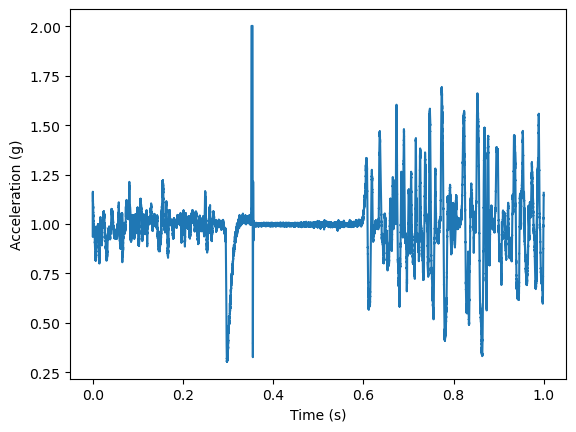

In [6]:
plt.plot(df["Time"], df["2g_accel"])
# plt.plot(df["Time"], df["pore_pressure"])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
# plt.show()

83
Peak in file: True


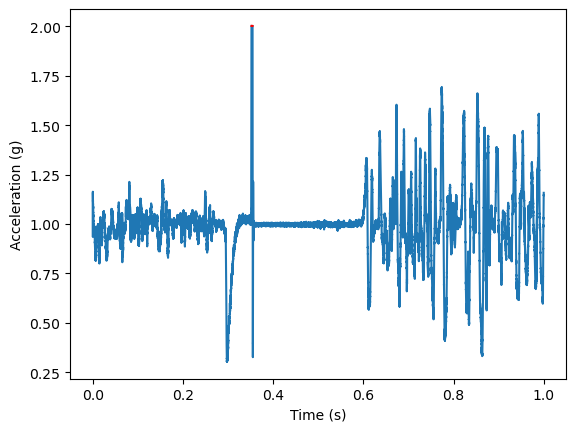

In [24]:
# Find the peaks
from scipy.signal import find_peaks

peaks_indices, peak_dict_info =find_peaks(df["2g_accel"], height = 1.8)

plt.plot(df["Time"], df["2g_accel"])
# plt.plot(df["Time"], df["pore_pressure"])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")

plt.plot(df["Time"][peaks_indices], df["2g_accel"][peaks_indices], color = "red")
print(len(peaks_indices))


In [ ]:
for file in test_folder.pffp_files:
    print(file.file_name)

bLog0D2F.bin
bLog0D30.bin
bLog0D31.bin
bLog0D32.bin
bLog0D33.bin
bLog0D34.bin
bLog0D35.bin
bLog0D36.bin
bLog0D37.bin
bLog0D38.bin
bLog0D39.bin
bLog0D3A.bin
bLog0D3B.bin
bLog0D3C.bin
bLog0D3D.bin
bLog0D3E.bin
bLog0D3F.bin
bLog0D40.bin
bLog0D41.bin


In [ ]:
print(test_folder)

Folder: C:\Geotech_Research\Field_Analysis\Bluedrop_data\Mouth 1 
Date range: Not set 
PFFP id: 1                 
Calibration Param dir: C:\Geotech_Research\Field_Analysis\BlueDrop_Calibration_Factors.xlsx
